<h1 style="text-align:center">Diabetes Dataset Model</h1>


In [122]:
#importing section

import numpy as np
import numpy
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import GridSearchCV

<h2>Importing dataset</h2>


In [123]:
#importing database

dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<h2>Preprocessing</h2>
This section is about data preprocessing


In [124]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [125]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<h2>No columns has null values but alot of them have zero values</h2>


In [126]:
# Count number of zeros in all columns of Dataset
for column_name in dataset.columns:
    column = dataset[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  Pregnancies  is :  111
Count of zeros in column  Glucose  is :  5
Count of zeros in column  BloodPressure  is :  35
Count of zeros in column  SkinThickness  is :  227
Count of zeros in column  Insulin  is :  374
Count of zeros in column  BMI  is :  11
Count of zeros in column  DiabetesPedigreeFunction  is :  0
Count of zeros in column  Age  is :  0
Count of zeros in column  Outcome  is :  500


<h4>Expect for Age and DiabetesPedigreeFunciton all columns has 0 i.e null data</h4>


<h3>Expect for Pregnancies anda Outcome every other  column can't have 0 in it's value so replacing with average value</h3>


In [127]:
cols=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in range(0,len(cols)):
    dataset[cols[i]].replace(0,dataset[cols[i]].median(),inplace=True)

In [128]:
for column_name in dataset.columns:
    column = dataset[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  Pregnancies  is :  111
Count of zeros in column  Glucose  is :  0
Count of zeros in column  BloodPressure  is :  0
Count of zeros in column  SkinThickness  is :  0
Count of zeros in column  Insulin  is :  0
Count of zeros in column  BMI  is :  0
Count of zeros in column  DiabetesPedigreeFunction  is :  0
Count of zeros in column  Age  is :  0
Count of zeros in column  Outcome  is :  500


<h2 style='text-align:center'>Categorical data analysis</h2>


<h2>Outcome Analysis</h2>


In [129]:
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

/home/sujen/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


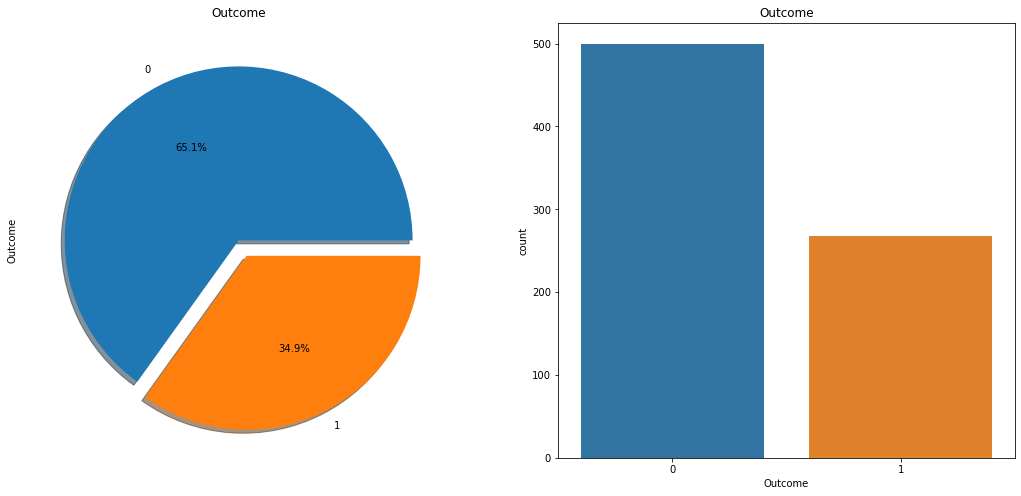

In [130]:
f,ax=plt.subplots(1,2,figsize=(18,8))
dataset['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
sns.countplot('Outcome',data=dataset,ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

<h2>Summary</h2>
<ol>
<li>65% of patients were not diabetic(500)</li>
<li>35% of patients were found to be diabetic(268)</li>
</ol>


<h2>Data-visualization</h2>


/home/sujen/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sujen/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/sujen/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sujen/anaconda3/lib/python3.9

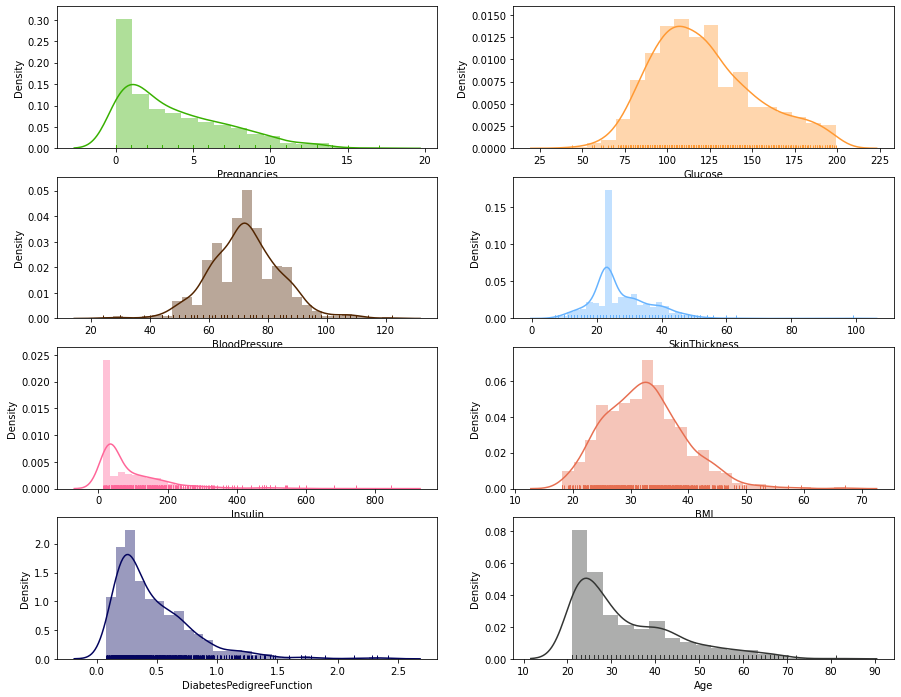

In [131]:
fig, axs = plt.subplots(4, 2, figsize=(15,12))
axs = axs.flatten()
sns.distplot(dataset['Pregnancies'],rug=True,color='#38b000',ax=axs[0])
sns.distplot(dataset['Glucose'],rug=True,color='#FF9933',ax=axs[1])
sns.distplot(dataset['BloodPressure'],rug=True,color='#522500',ax=axs[2])
sns.distplot(dataset['SkinThickness'],rug=True,color='#66b3ff',ax=axs[3])
sns.distplot(dataset['Insulin'],rug=True,color='#FF6699',ax=axs[4])
sns.distplot(dataset['BMI'],color='#e76f51',rug=True,ax=axs[5])
sns.distplot(dataset['DiabetesPedigreeFunction'],color='#03045e',rug=True,ax=axs[6])
sns.distplot(dataset['Age'],rug=True,color='#333533',ax=axs[7])
plt.show()

<h3>Making a new column i.e. has_children</h3>
<i>Based on the assumption that all the pregnancies resultedin child birth</i>


In [132]:
dataset['has_child'] = dataset['Pregnancies']
dataset['has_child'] = dataset['has_child'].apply(lambda x: 1 if x > 0 else 0)
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,has_child
0,6,148,72,35,30.5,33.6,0.627,50,1,1
1,1,85,66,29,30.5,26.6,0.351,31,0,1
2,8,183,64,23,30.5,23.3,0.672,32,1,1
3,1,89,66,23,94.0,28.1,0.167,21,0,1
4,0,137,40,35,168.0,43.1,2.288,33,1,0


In [133]:
dataset['has_child'].value_counts()

1    657
0    111
Name: has_child, dtype: int64

/home/sujen/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


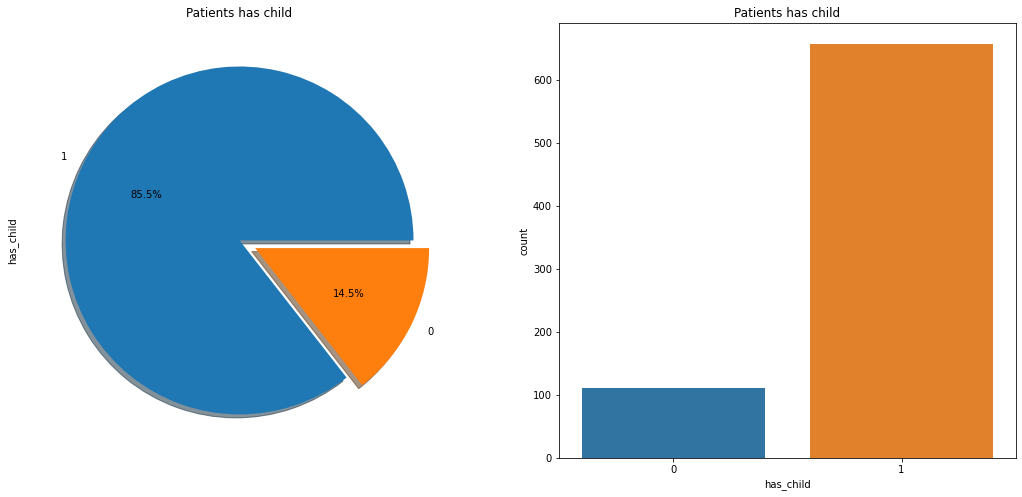

In [134]:
f,ax=plt.subplots(1,2,figsize=(18,8))
dataset['has_child'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Patients has child')
sns.countplot('has_child',data=dataset,ax=ax[1])
ax[1].set_title('Patients has child')
plt.show()

<h3>The number of patients that have both diabetes and Child</h3>


In [135]:
dataset.groupby(['has_child','Outcome'])['Outcome'].count()

has_child  Outcome
0          0           73
           1           38
1          0          427
           1          230
Name: Outcome, dtype: int64

/home/sujen/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


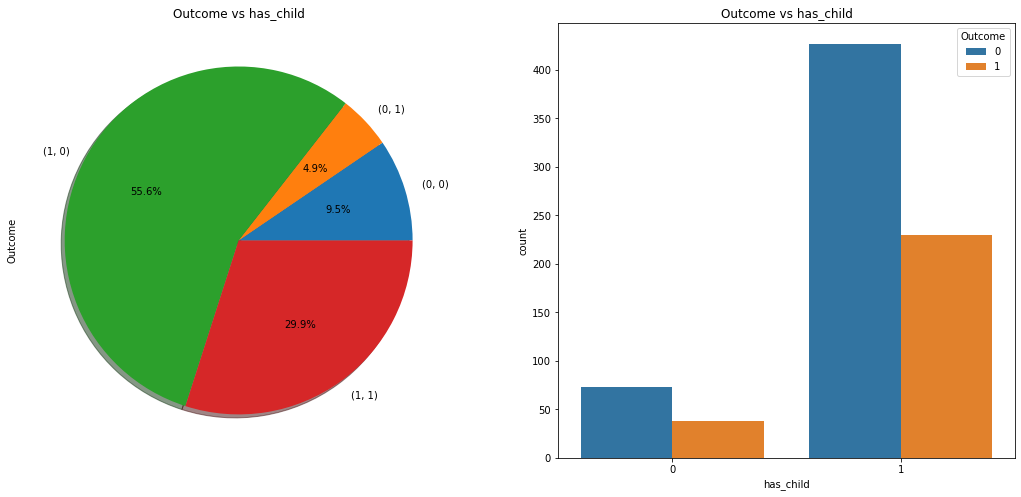

In [136]:
f,ax=plt.subplots(1,2,figsize=(18,8))
dataset.groupby(['has_child','Outcome'])['Outcome'].count().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Outcome vs has_child')
sns.countplot('has_child',hue='Outcome',data=dataset,ax=ax[1])
ax[1].set_title('Outcome vs has_child')
plt.show()

In [137]:
dataset['Outcome'].corr(dataset['has_child'])

0.00570535313788472

<h3>Summary</h3>
<ol>
    <li>Almost all the patients had children(85.5%)</li>
    <li>There is no significant corelation between having child and diabetes
</ol>


<h4>There is no ordinal data in dataset so, No need ot do ordinal data analysis</h4>


<h2 style="text-align:center">Continous data analysis</h2>


<h3>Preganancies analysis<h3>


In [138]:
dataset['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

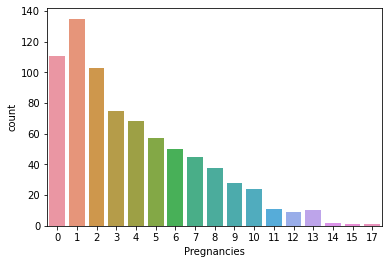

In [139]:

# count plot on single categorical variable
sns.countplot(x ='Pregnancies', data = dataset)

# Show the plot
plt.show()

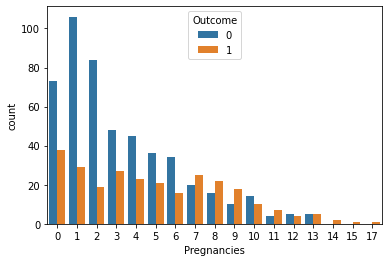

In [140]:
sns.countplot(x ='Pregnancies', hue= 'Outcome', data = dataset)
 
# Show the plot
plt.show()

In [141]:
dataset['Outcome'].corr(dataset['Pregnancies'])

0.2218981530339865

<h3>Summary</h3>
<ol>
<li>The maximum and minimum number of pregnancies were 17 and 0 respectively</li>
<li>The group having the most patient in data were of single pregnancy</li>
<li>It is a general trend that the more number of pregnancies that patients had, there was more probability that they were diabetic</li>
<li>The patients that had more than 13 pregnancies were all diabetic</li>

</ol>


<h3>Gulcose Analysis</h3>


In [142]:
print(dataset['Glucose'].max())
print(dataset['Glucose'].min())


199
44


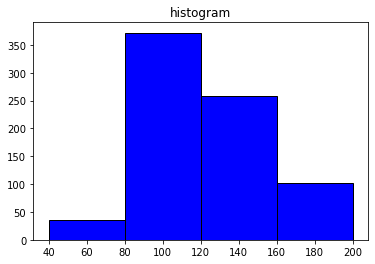

In [143]:
plt.hist(dataset['Glucose'], bins = [40,80,120,160,200],edgecolor='black',color='blue') 
plt.title("histogram") 
plt.show()

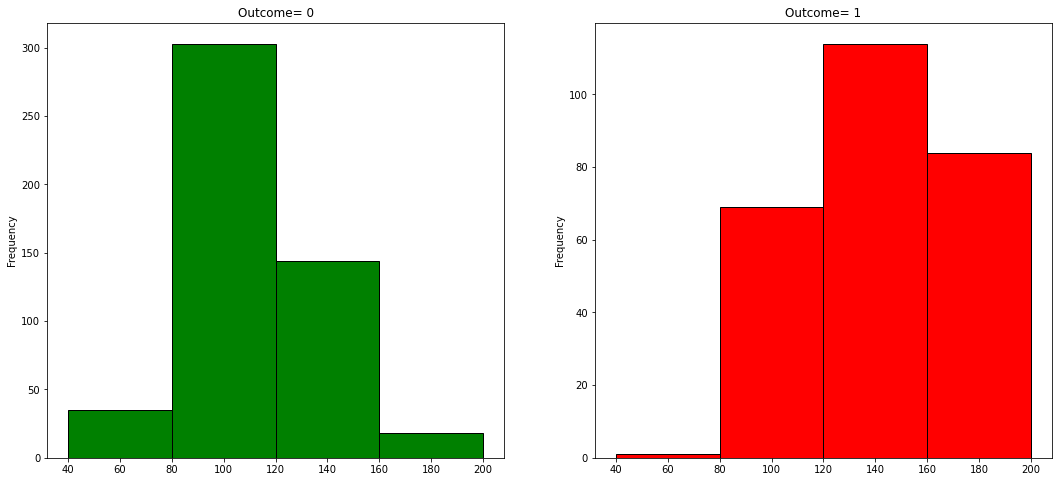

In [144]:
f,ax=plt.subplots(1,2,figsize=(18,8))
dataset[dataset['Outcome']==0].Glucose.plot.hist(ax=ax[0],bins = [40,80,120,160,200],edgecolor='black',color='green')
ax[0].set_title('Outcome= 0')
dataset[dataset['Outcome']==1].Glucose.plot.hist(ax=ax[1],color='red',bins = [40,80,120,160,200],edgecolor='black')
ax[1].set_title('Outcome= 1')
plt.show()

In [145]:
dataset['Outcome'].corr(dataset['Glucose'])

0.49278240391502615

<h2>Summary</h2>
<ol>
<li>The maximum patient had gulcose level of 80-120</li>
<li>Patient were most diabetic in gulcose level 120-160, followed by 160-200 and finally by 80-120</li>
<li>Almost no patient were diabetic in gulcose level 40-80</li>

</ol>


<h3>Blood Pressure Analysis</h3>


In [146]:
print(dataset['BloodPressure'].max())
print(dataset['BloodPressure'].min())


122
24


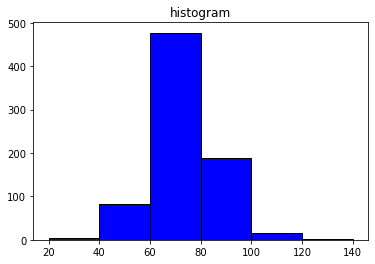

In [147]:
plt.hist(dataset['BloodPressure'], bins = [20,40,60,80,100,120,140],edgecolor='black',color='blue') 
plt.title("histogram") 
plt.show()

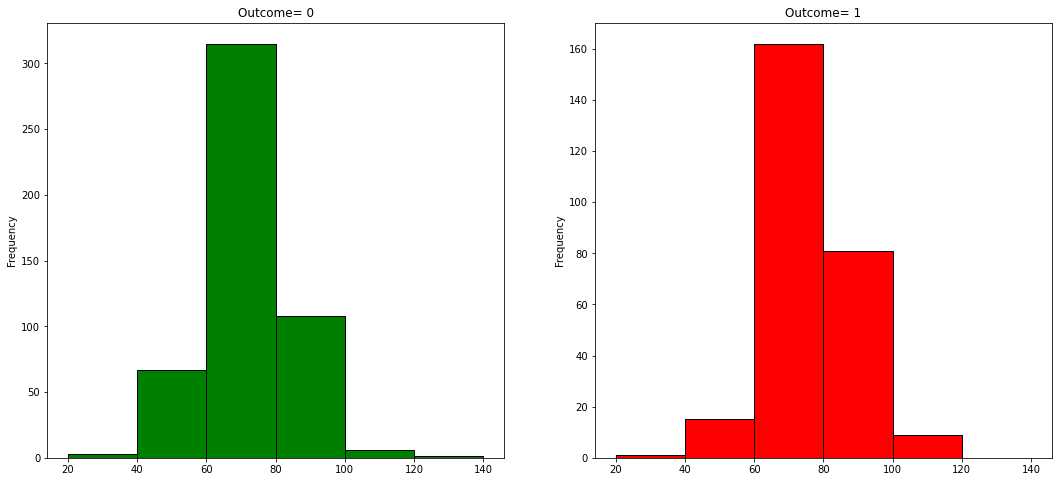

In [148]:
f,ax=plt.subplots(1,2,figsize=(18,8))
dataset[dataset['Outcome']==0].BloodPressure.plot.hist(ax=ax[0],bins = [20,40,60,80,100,120,140],edgecolor='black',color='green')
ax[0].set_title('Outcome= 0')
dataset[dataset['Outcome']==1].BloodPressure.plot.hist(ax=ax[1],color='red',bins = [20,40,60,80,100,120,140],edgecolor='black')
ax[1].set_title('Outcome= 1')
plt.show()

In [149]:
dataset['Outcome'].corr(dataset['BloodPressure'])

0.16572291308057632

<h2>Summary</h2>
<ol>
<li>The maximum Blood pressure of patient was found out to be 122 and minimum was 24</li>
<li>The patient having maximum blood pressure was not diabetic</li>
<li>There is no significant corelation between Blood pressure and diabetes</li>

<i>The high corelation value may be caused because of BMI that has linear corelation with Blood Pressure</i>

</ol>


<h2>Skin thickness analysis</h2>


In [150]:
dataset['SkinThickness'].corr(dataset['BloodPressure'])


0.14780938478347314

Skin thickness a.k.a Skinfold Thickness Measurement is a test that determines the total fat content of the body by measuring the thivknes sof skin at different parts of the body.<br> In essense it measures the total body fat, so it is similar to BMI so we can use one or the other for our model.


<h2>Insulin Analysis</h2>


In [151]:
dataset['Insulin'].corr(dataset['BloodPressure'])


-0.02872124316935386

<p>Insulin is a hormone produced in the pancreas, which regulates the amount of glucose in the blood. The lack of insulin causes a form of diabetes.</p>
<p>So, we can take only the Gulcose level and ommit insulin (this is also done because Glucose had more corelation with outcome and the no. of values missing was far less in Gulcose level)</p>


<h2>BMI analysis</h2>


In [152]:
print(dataset['BMI'].max())
print(dataset['BMI'].min())


67.1
18.2


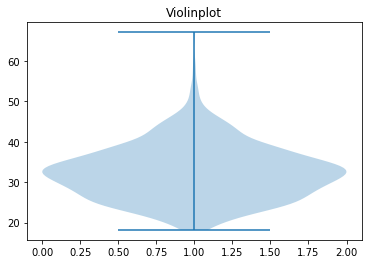

In [153]:
plt.violinplot(dataset['BMI'],widths=2) 
plt.title("Violinplot") 
plt.show()

<h2>Diabetes Pedgree Funciton Analysis</h2>
It is a probability function that determines the likelihood of transmission of diabetes from parent ot children.<br>
It values lies between 0 and 1, but in the dataset<br> there are data's that have values grater than 1(DPF>1) 

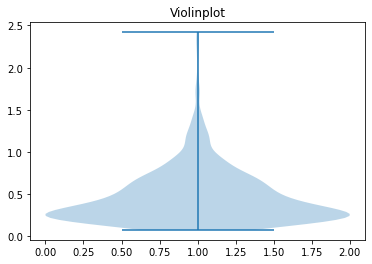

In [154]:
plt.violinplot(dataset['DiabetesPedigreeFunction'],widths=2) 
plt.title("Violinplot") 
plt.show()

In [155]:
dataset.loc[dataset['DiabetesPedigreeFunction'] > 1, 'DiabetesPedigreeFunction'] = 1

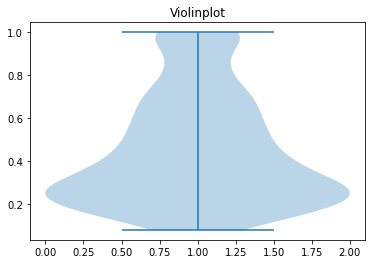

In [156]:
plt.violinplot(dataset['DiabetesPedigreeFunction'],widths=2) 
plt.title("Violinplot") 
plt.show()

In [157]:
dataset['Outcome'].corr(dataset['DiabetesPedigreeFunction'])

0.18260440225223712

<h2>Age Analysis</h2>

In [158]:
print(dataset['Age'].max())
print(dataset['Age'].min())

81
21


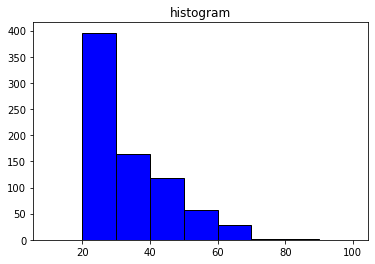

In [160]:
plt.hist(dataset['Age'], bins = [10,20,30,40,50,60,70,80,90,100],edgecolor='black',color='blue') 
plt.title("histogram") 
plt.show()

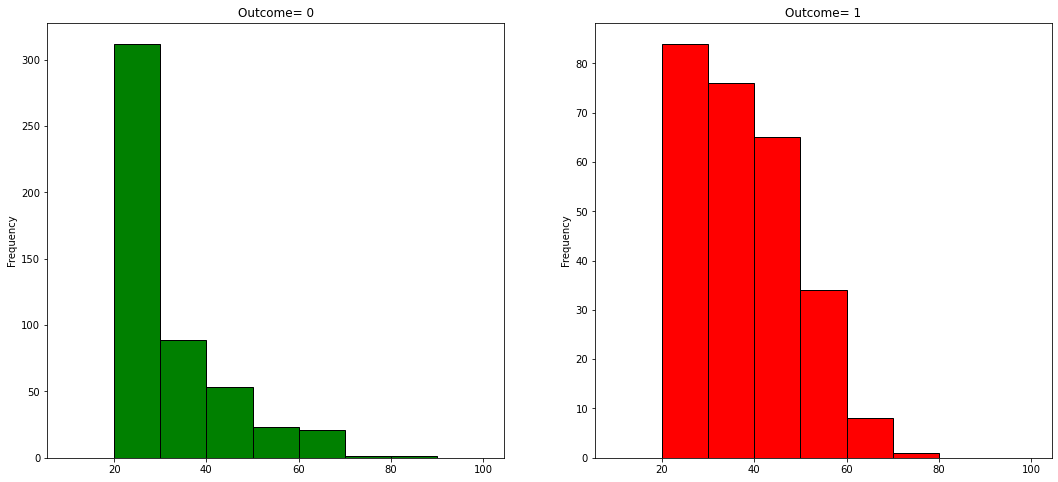

In [163]:
f,ax=plt.subplots(1,2,figsize=(18,8))
dataset[dataset['Outcome']==0].Age.plot.hist(ax=ax[0],bins = [10,20,30,40,50,60,70,80,90,100],edgecolor='black',color='green')
ax[0].set_title('Outcome= 0')
dataset[dataset['Outcome']==1].Age.plot.hist(ax=ax[1],color='red',bins = [10,20,30,40,50,60,70,80,90,100],edgecolor='black')
ax[1].set_title('Outcome= 1')
plt.show()

<h2>Summary</h2>
<ol>
<li>The maximum of patients were from age group 20-30</li>
<li>The patient with the highest age i.e. 81 was not diabetic</li>
<li>The age group having the highest number of diabetics was 20-30 and so on in decreasing order</li>
</ol>

<h2 style="text-align:center">Feature selection<h2>


In [164]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,has_child
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.016269,0.544341,0.221898,0.469341
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.110665,0.266909,0.492782,-0.018158
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,0.006999,0.324915,0.165723,-0.042601
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.124914,0.054514,0.189065,-0.069803
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.166143,-0.015413,0.148457,-0.007253
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.139156,0.025744,0.312249,-0.161763
DiabetesPedigreeFunction,-0.016269,0.110665,0.006999,0.124914,0.166143,0.139156,1.000000,0.046170,0.182604,-0.032847
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.046170,1.000000,0.238356,0.197159
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.182604,0.238356,1.000000,0.005705
has_child,0.469341,-0.018158,-0.042601,-0.069803,-0.007253,-0.161763,-0.032847,0.197159,0.005705,1.000000


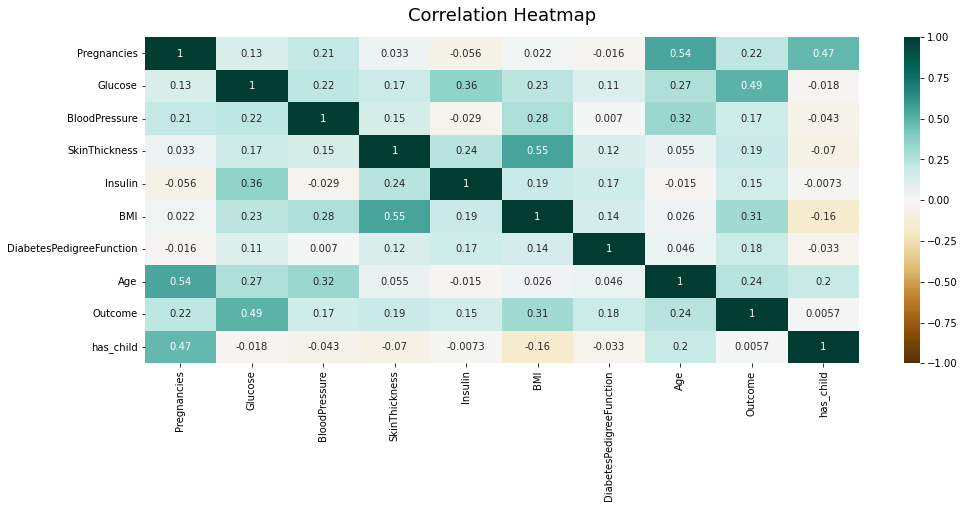

In [167]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

<h4>Removing the weakly correlated data colums</h4>

In [169]:
dataset.drop(['BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction','has_child'],axis=1,inplace=True)

In [170]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pregnancies  768 non-null    int64  
 1   Glucose      768 non-null    int64  
 2   BMI          768 non-null    float64
 3   Age          768 non-null    int64  
 4   Outcome      768 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 30.1 KB


<h4>As age and Pregancy is strongly correlated <br>and since age is more correlated with Outcome Droping Pregnancies</h4>

In [172]:
dataset.drop('Pregnancies',axis=1,inplace=True)

<h2 style="text-align:center">Building Model</h2>

In [173]:
svc = SVC()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
nb = GaussianNB()
rfc =RandomForestClassifier()

models = {'svc':svc, 'knn':knn, 'dtc':dtc, 'nb':nb, 'rfc':rfc}

x = dataset.drop('Outcome', axis = 1)
y = dataset['Outcome']

In [174]:
x.shape

(768, 3)

In [175]:
y.shape

(768,)

In [176]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)

In [188]:
model_accuracy = {}
for model in models.keys():
    mod = models[model].fit(x_train, y_train)
    predict = mod.predict(x_test)
    print(f"{model}")
    print(confusion_matrix(predict,y_test))
    if model not in model_accuracy.keys():
        model_accuracy.update({model:accuracy_score(y_test, predict)})

svc
[[94 27]
 [ 5 28]]
knn
[[81 19]
 [18 36]]
dtc
[[74 20]
 [25 35]]
nb
[[87 22]
 [12 33]]
rfc
[[84 22]
 [15 33]]


In [189]:
model_accuracy

{'svc': 0.7922077922077922,
 'knn': 0.7597402597402597,
 'dtc': 0.7077922077922078,
 'nb': 0.7792207792207793,
 'rfc': 0.7597402597402597}

Since SVC had the greatest accuracy using hyper parameter tuning in svc

In [186]:
params = {
    'C':[0.1,1,10,100], 
    'gamma':[1,0.1,0.01], 
    'kernel':['rbf','linear']
    }

svc_model = GridSearchCV(svc,
    params,
    verbose=1, #Progress bar showing
    cv=20, #cross validation
    n_jobs=-1, #cores to assign
)
#fit model to data
svc_model.fit(x_train, y_train)
print(svc_model.best_params_)
print(svc_model.best_score_)

Fitting 20 folds for each of 24 candidates, totalling 480 fits
{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
0.7671505376344085
